# DETECTOR DE ASTEROIDES CON LightGBM

### Analisis de datos POR CHRISTIAN ALTAMIRANO 
###### proyecto planteado para la postulacion a ASISTENTE DEL OBSERVATORIO ASTRONÓMICO De La Escuela Politécnica Nacional

Este es un proyecto de clasificación, por medio del LightGBM (modelo de ML) que aprende de las caracteristicas de los objetos detectados en el espacio, para clasificar cual de ellos son asteroides. Los datos probienen de https://ssd.jpl.nasa.gov/tools/sbdb_query.html "Consulta de base de datos de cuerpo pequeño".El objetivo de este proyecto es detectar asteroides potencialmente peligrosos (Columna 'pha') a partir de las caracteristicas de sus datos (resto de columnas).

In [1]:
import pandas as pd

Importamos las librerias que se usaran en este proyecto (posteriormente se añadiran más).

In [2]:
data = pd.read_csv('C:\\Users\\Cris\\OneDrive\\Desktop\\dataset.csv', index_col ='id')

C:\Users\Cris\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Llamamos al archivo de datos dentro de primero el proyecto IMB Watson, luego lo llamamos al notebook y lo transformamos en un dataframe de Pandas llamado "data".

In [3]:
#como jupiter nos permite solo la visualizacion de una cierta cantidad de columnas, modificamos el set para ver hasta 500 columnas y ver los datos completos. 
pd.set_option('display.max_columns', 570)
#Visualizamos los primeros 5 casos
data.head()

,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


Estos son los cinco primeros objetos del conjunto de datos del satelite. Para empezar el analisis, vamos a partir depurando la base.
Empezamos viendo el "tipo"de datos con el que estan registradas las columnas. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958524 entries, a0000001 to bT3S2678
Data columns (total 44 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   spkid           958524 non-null  int64  
 1   full_name       958524 non-null  object 
 2   pdes            958524 non-null  object 
 3   name            22064 non-null   object 
 4   prefix          18 non-null      object 
 5   neo             958520 non-null  object 
 6   pha             938603 non-null  object 
 7   H               952261 non-null  float64
 8   diameter        136209 non-null  float64
 9   albedo          135103 non-null  float64
 10  diameter_sigma  136081 non-null  float64
 11  orbit_id        958524 non-null  object 
 12  epoch           958524 non-null  float64
 13  epoch_mjd       958524 non-null  int64  
 14  epoch_cal       958524 non-null  float64
 15  equinox         958524 non-null  object 
 16  e               958524 non-null  float64
 17  a     

Por lo visto existen muchas columnas con números decimales, objetos y dos columnas con números enteros. Existe una asimetria en las columnas; muchos datos nulos en algumnas de las columnas.

In [5]:
data.shape

(958524, 44)

Dado que existen muchos datos incompletos lo mejor es preguntarse si los objetos son identificados o son objetos no identificados, por ello se reviza las columnas de identificación ('spkid', 'full_name', 'pdes' y 'name'). 

In [6]:
print(data['spkid'].isnull().sum())
print(data['full_name'].isnull().sum())
print(data['pdes'].isnull().sum())
print(data['name'].isnull().sum())

0
0
0
936460


A la columna 'name' le falta mucha información. Parece ser que el resto de columnas poseen informacion completa para identificar los cuerpos captados por el satelite. Esta columna puede ser eliminada pero antes de eliminar informacion, revisemos las demas variables.

Primero la variable objetivo, "pha".

In [7]:
print(data['pha'].isnull().sum())
print((data['pha'].isnull().sum()/len(data['pha'])))
print(data['pha'].value_counts())

19921
0.020782995522282174
N    936537
Y      2066
Name: pha, dtype: int64


Por lo visto existe informacion faltante en la coumna objetivo, un 2.1% de datos faltantes (19921) e indica que existen 936.537 asteroides potencialmente NO peligrosos y 2.066 asteroides que SI son potencialmente peligrosos.

Continuemos con la columna de objetos cercanos a la tierra, "neo".

In [8]:
print(data['neo'].isnull().sum())
print((data['neo'].isnull().sum()/len(data['pha'])))
print(data['neo'].value_counts())
print(data['neo'].value_counts(normalize = True))

4
4.1730827814431355e-06
N    935625
Y     22895
Name: neo, dtype: int64
N    0.976114
Y    0.023886
Name: neo, dtype: float64


Existen 4 valores perdidos, menos del >1% de información perdida e indica que hay 935.625 objetos lejanos a la tierra (97.61%) y apenas 22.895 objetos cercanos a la tierra (2.31%). 

Vamos a continuar con la columna de identificacion de orbitas, "orbit_id".

In [9]:
print(data['orbit_id'].value_counts())
print(data['orbit_id'].nunique())
print(data['orbit_id'].unique())
print(data['orbit_id'].isnull().sum())

1            50142
JPL 1        47494
JPL 2        34568
JPL 3        29931
12           29136
             ...  
MPO488005        1
MPO478565        1
MPO489827        1
MPO491563        1
MPO488129        1
Name: orbit_id, Length: 4690, dtype: int64
4690
['JPL 47' 'JPL 37' 'JPL 112' ... 'E2020H77' 'E2020K86' 'E2020J48']
0


Por lo visto existen varias orbitas de los objetos, en total 4690. Existen multiples objetos por cada orbita. No posee perdida de información (datos completos).

Continuemos con la columna de identificacion, "prefix".

In [10]:
print(data['prefix'].isnull().sum())
print((data['prefix'].isnull().sum()/len(data['pha'])))
print(data['prefix'].value_counts())
print(data['prefix'].value_counts(normalize = True))

958506
0.9999812211274836
A    18
Name: prefix, dtype: int64
A    1.0
Name: prefix, dtype: float64


Esta columna no posee informcaion en el 99.99% de sus celdas y cuenta con apenas un solo dato.

Siguiente columna, "equinox".

In [11]:
print(data['equinox'].isnull().sum())
print((data['equinox'].isnull().sum()/len(data['pha'])))
print(data['equinox'].value_counts())
print(data['equinox'].value_counts(normalize = True))

0
0.0
J2000    958524
Name: equinox, dtype: int64
J2000    1.0
Name: equinox, dtype: float64


Esta columna solo posee un unico dato para todos los casos. No aporta información.

Analicemos el caso de la columna de clase de objeto, "class".

In [12]:
print(data['class'].isnull().sum())
print((data['class'].isnull().sum()/len(data['pha'])))
print(data['class'].value_counts())
print(data['class'].value_counts(normalize = True))

0
0.0
MBA    855954
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3468
ATE      1729
CEN       506
AST        76
IEO        22
HYA         4
Name: class, dtype: int64
MBA    0.892992
OMB    0.029582
IMB    0.021241
MCA    0.019494
APO    0.013236
AMO    0.008823
TJN    0.008577
TNO    0.003618
ATE    0.001804
CEN    0.000528
AST    0.000079
IEO    0.000023
HYA    0.000004
Name: class, dtype: float64


La columna "class" no posee informacion faltante, la categoria mas común de los objetos detectados es "MBA" (89%), seguido de la clase "OMB" (2.95%)...

Debido a este analisis podemos eliminar algunas de las columnas con información insuficiente o irrelevante.

In [13]:
datae = data.drop(['pdes', 'name', 'prefix', 'equinox', 'name', 'diameter', 'albedo', 'diameter_sigma'], axis = 1) 

### Limpieza de datos

En este apartado vamos a dejar una base de datos lista para trabajar. Primero se genera un nuevo Data Frame ('ast') donde se limpien los valores de las columnas mas importantes, solo tomaremos los valores no nulos de las mismas. Tomaremos las columnas ['pha', 'H', 'sigma_ad', 'ma'] como parametros de selección.

In [14]:
ast = datae[datae['pha'].notna()]
ast = ast[ast['H'].notna()]
ast = ast[ast['sigma_ad'].notna()]
ast = ast[ast['ma'].notna()]

Una vez eliminamos esos casos podemos comprobar los valores faltantes con la siguiente consulta, no existen mas valores faltantes en el DataFrame.

In [15]:
ast.isnull().sum()

spkid        0
full_name    0
neo          0
pha          0
H            0
orbit_id     0
epoch        0
epoch_mjd    0
epoch_cal    0
e            0
a            0
q            0
i            0
om           0
w            0
ma           0
ad           0
n            0
tp           0
tp_cal       0
per          0
per_y        0
moid         0
moid_ld      0
sigma_e      0
sigma_a      0
sigma_q      0
sigma_i      0
sigma_om     0
sigma_w      0
sigma_ma     0
sigma_ad     0
sigma_n      0
sigma_tp     0
sigma_per    0
class        0
rms          0
dtype: int64

Bien ahora esta base de datos esta limpia, sin embargo aun no podemos trabajar con ella. Primero debemos de asegurarnos de que los tipos de datos esten bien asignados, la normalizacion de datos, estandarizacion, etc. Empezemos por los tipos de datos.

Del analisis anterior podemos decir que la variable "neo" solo posee valores N o Y para objetos cercanos o lejanos a ala tierra, por lo que es una cetgoria, ocurre lo mimso con las variables 'pha' y 'class'.

In [16]:
ast['neo'] = ast['neo'].astype('category')
ast['pha'] = ast['pha'].astype('category')
ast['class'] = ast['class'].astype('category')

Revisemos que proporcion de objetos se encuentran cerca de la tierra.

C:\Users\Cris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


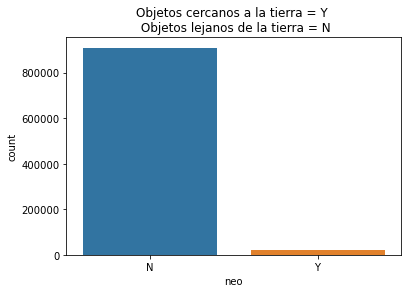

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(ast['neo'])
plt.title('Objetos cercanos a la tierra = Y \n Objetos lejanos de la tierra = N')
plt.show()

por lo visto son una parte muy pequeña. Veamos que parte de los objetos cercanos son peligrosos.

C:\Users\Cris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


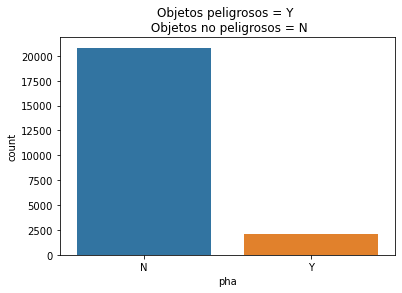

N    20817
Y     2066
Name: pha, dtype: int64 
 N    0.909715
Y    0.090285
Name: pha, dtype: float64


In [18]:
sns.countplot(ast[ast['neo']=='Y']['pha'])
plt.title('Objetos peligrosos = Y \n Objetos no peligrosos = N')
plt.show()
print(ast[ast['neo']=='Y']['pha'].value_counts(),'\n' ,ast[ast['neo']=='Y']['pha'].value_counts(normalize = True))

Como podemos ver es apenas el 9% de objetos cercanos a la tierra son los que se consideran peligorsos (2066).

In [19]:
print((ast['pha'].value_counts (normalize = True))*100)
print((ast[ast['pha']=='Y']['neo'].value_counts(normalize = True))*100)

N    99.778406
Y     0.221594
Name: pha, dtype: float64
Y    100.0
N      0.0
Name: neo, dtype: float64


Y del total de objetos (cercanos y lejanos) solo representan el 0.22%.

Todos los objetos peligrosos estan cerca a la tierra.
Veamos las clases de los objetos.

C:\Users\Cris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


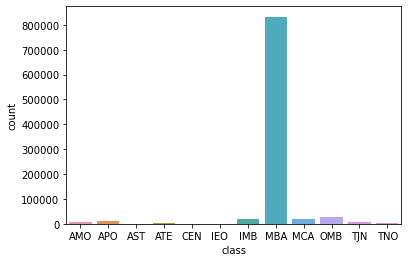

MBA    89.308028
OMB     2.914189
IMB     2.113189
MCA     1.908005
APO     1.360455
AMO     0.906112
TJN     0.871146
TNO     0.371004
ATE     0.185448
CEN     0.053951
AST     0.006114
IEO     0.002360
Name: class, dtype: float64


In [20]:
sns.countplot(ast['class'])
plt.show()
print(ast['class'].value_counts(normalize = True)*100)

Como se habia mencionado antes la clase mas comun de objeto es MBA. Veamos cuantas orbitas existen.

In [21]:
ast['orbit_id'].nunique()

525

estamos listos!

### Analisis de datos

Primero veamos que orbitas tienen menos ocurrencias.

In [22]:
ocuur = ast['orbit_id'].value_counts().loc[lambda x: x<10].index.tolist()
len(ocuur)

331

Existen 331 orbitas con menos de 10 objetos en ellas.

In [23]:
ast = ast.reset_index(drop=True)

es momento de normalizar los datos, usaremos el metodo MinMaxScaler de la libreria sklearn, este metodo realiza la divicion del dato de forma
$x/(min-max)$

devuelve el dato en un rango de 0 a 1 segun su dispercion.

In [24]:
num = ast[ast.columns[~ast.columns.isin(['spkid', 'full_name', 'neo', 'pha', 'orbit_id', 'class'])]]
from sklearn import preprocessing
sc = preprocessing.MinMaxScaler()
sc_df = sc.fit_transform(num)
sc_df = pd.DataFrame(sc_df, columns = num.columns)
ast = pd.concat([ast[['spkid', 'full_name', 'neo', 'pha', 'orbit_id', 'class']],sc_df], axis=1)
sc_df.head()

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
0,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,0.060467,0.223071,0.204438,0.258627,0.000035,0.089827,0.665157,0.665258,6.843780e-07,6.843780e-07,0.020066,0.020066,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000161
1,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,0.198916,0.480625,0.861674,0.379616,0.000041,0.089600,0.665470,0.665298,6.862835e-07,6.862835e-07,0.015530,0.015530,8.098714e-13,1.241322e-15,8.699747e-14,6.262048e-11,5.179478e-12,2.713159e-16,2.650639e-16,8.984495e-16,6.029037e-14,3.912546e-18,1.921434e-16,0.000134
2,0.187464,1.000000,1.000000,1.000000,0.256972,0.000063,0.023805,0.074158,0.471810,0.689073,0.344645,0.000040,0.094969,0.665944,0.665354,6.436662e-07,6.436662e-07,0.013014,0.013014,7.740059e-13,1.067960e-15,8.016988e-14,5.816901e-11,1.383063e-11,5.285854e-16,2.426430e-16,7.900225e-16,5.717040e-14,3.384558e-18,1.621282e-16,0.000126
3,0.119534,0.988218,0.988218,0.989134,0.088732,0.000054,0.025911,0.040748,0.288363,0.418691,0.291718,0.000029,0.114070,0.665191,0.665269,5.245750e-07,5.245750e-07,0.014337,0.014337,5.793050e-15,4.640170e-16,1.880819e-15,3.839709e-12,2.721975e-13,3.373713e-18,3.590511e-17,2.972008e-16,3.377845e-14,3.903861e-19,6.623144e-17,0.000149
4,0.233236,1.000000,1.000000,1.000000,0.190939,0.000060,0.025049,0.030614,0.393253,0.996247,0.152094,0.000036,0.100232,0.667768,0.668020,6.063194e-07,6.063194e-07,0.013787,0.013787,6.019577e-13,1.221946e-15,6.000437e-14,4.945222e-11,2.409083e-11,8.914896e-16,2.484347e-16,8.562875e-16,7.157914e-14,3.332230e-18,1.821889e-16,0.000194


Para hacer esta transformacion solo se consideraron las variables numericas, es momento de generar clases para las variables categoricas. Es decir, variables dummies (ficticias o dicotomicas).

In [25]:
aste = pd.get_dummies(ast, columns = ['neo', 'class', 'orbit_id']) 
aste.head()

,spkid,full_name,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,neo_N,neo_Y,class_AMO,class_APO,class_AST,class_ATE,class_CEN,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO,orbit_id_1,orbit_id_10,orbit_id_100,orbit_id_101,orbit_id_102,orbit_id_103,orbit_id_104,orbit_id_105,orbit_id_106,orbit_id_107,orbit_id_108,orbit_id_109,orbit_id_11,orbit_id_110,orbit_id_111,orbit_id_112,orbit_id_113,orbit_id_114,orbit_id_115,orbit_id_116,orbit_id_117,orbit_id_118,orbit_id_119,orbit_id_12,orbit_id_120,orbit_id_121,orbit_id_122,orbit_id_123,orbit_id_124,orbit_id_125,orbit_id_127,orbit_id_128,orbit_id_129,orbit_id_13,orbit_id_130,orbit_id_131,orbit_id_132,orbit_id_133,orbit_id_134,orbit_id_135,orbit_id_136,orbit_id_137,orbit_id_138,orbit_id_139,orbit_id_14,orbit_id_140,orbit_id_141,orbit_id_142,orbit_id_143,orbit_id_144,orbit_id_145,orbit_id_146,orbit_id_147,orbit_id_149,orbit_id_15,orbit_id_150,orbit_id_151,orbit_id_152,orbit_id_153,orbit_id_155,orbit_id_157,orbit_id_158,orbit_id_159,orbit_id_16,orbit_id_160,orbit_id_161,orbit_id_163,orbit_id_164,orbit_id_165,orbit_id_166,orbit_id_167,orbit_id_168,orbit_id_17,orbit_id_170,orbit_id_172,orbit_id_173,orbit_id_176,orbit_id_177,orbit_id_178,orbit_id_179,orbit_id_18,orbit_id_180,orbit_id_183,orbit_id_184,orbit_id_185,orbit_id_187,orbit_id_188,orbit_id_19,orbit_id_190,orbit_id_191,orbit_id_192,orbit_id_193,orbit_id_194,orbit_id_195,orbit_id_197,orbit_id_199,orbit_id_2,orbit_id_20,orbit_id_200,orbit_id_204,orbit_id_205,orbit_id_206,orbit_id_207,orbit_id_209,orbit_id_21,orbit_id_210,orbit_id_211,orbit_id_212,orbit_id_214,orbit_id_215,orbit_id_216,orbit_id_218,orbit_id_219,orbit_id_22,orbit_id_220,orbit_id_221,orbit_id_222,orbit_id_223,orbit_id_229,orbit_id_23,orbit_id_230,orbit_id_231,orbit_id_232,orbit_id_233,orbit_id_235,orbit_id_237,orbit_id_238,orbit_id_239,orbit_id_24,orbit_id_240,orbit_id_241,orbit_id_243,orbit_id_247,orbit_id_248,orbit_id_25,orbit_id_250,orbit_id_253,orbit_id_255,orbit_id_256,orbit_id_26,orbit_id_260,orbit_id_27,orbit_id_28,orbit_id_280,orbit_id_29,orbit_id_294,orbit_id_3,orbit_id_30,orbit_id_303,orbit_id_309,orbit_id_31,orbit_id_311,orbit_id_313,orbit_id_32,orbit_id_324,orbit_id_33,orbit_id_333,orbit_id_34,orbit_id_35,orbit_id_36,orbit_id_360,orbit_id_37,orbit_id_371,orbit_id_38,orbit_id_383,orbit_id_39,orbit_id_393,orbit_id_4,orbit_id_40,orbit_id_406,orbit_id_41,orbit_id_418,orbit_id_42,orbit_id_43,orbit_id_44,orbit_id_442,orbit_id_446,orbit_id_45,orbit_id_453,orbit_id_456,orbit_id_46,orbit_id_47,orbit_id_48,orbit_id_489,orbit_id_49,orbit_id_5,orbit_id_50,orbit_id_501,orbit_id_51,orbit_id_510,orbit_id_52,orbit_id_53,orbit_id_54,orbit_id_55,orbit_id_559,orbit_id_56,orbit_id_57,orbit_id_58,orbit_id_59,orbit_id_6,orbit_id_60,orbit_id_61,orbit_id_62,orbit_id_63,orbit_id_64,orbit_id_65,orbit_id_656,orbit_id_66,orbit_id_67,orbit_id_68,orbit_id_69,orbit_id_7,orbit_id_70,orbit_id_71,orbit_id_712,orbit_id_72,orbit_id_73,orbit_id_74,orbit_id_75,orbit_id_76,orbit_id_77,orbit_id_78,orbit_id_783,orbit_id_79,orbit_id_8,orbit_id_80,orbit_id_81,orbit_id_82,orbit_id_83,orbit_id_84,orbit_id_85,orbit_id_86,orbit_id_87,orbit_id_88,orbit_id_89,orbit_id_9,orbit_id_90,...,orbit_id_94,orbit_id_95,orbit_id_96,orbit_id_97,orbit_id_98,orbit_id_99,orbit_id_JPL 1,orbit_id_JPL 10,orbit_id_JPL 100,orbit_id_JPL 1000,orbit_id_JPL 101,orbit_id_JPL 102,orbit_id_JPL 103,orbit_id_JPL 104,orbit_id_JPL 105,orbit_id_JPL 106,orbit_id_JPL 107,orbit_id_JPL 108,orbit_id_JPL 109,orbit_id_JPL 11,orbit_id_JPL 110,orbit_id_JPL 111,orbit_id_JPL 112,orbit_id_JPL 113,orbit_id_JPL 114,orbit_id_JPL 115,orbit_id_JPL 116,orbit_id_JPL 117,orbit_id_JPL 118,orbit_id_JPL 119,orbit_id_JPL 12,orbit_id_JPL 120,orbit_id_JPL 121,orbit_id_JPL 122,orbit_id_JPL 123,orbit_id_JPL 124,orbit_id_JPL 125,orbit_id_JPL 126,orbit_id_JPL 127,orbit_id_JPL 128,orbit_id_JPL 129,orbit_id_JPL 13,or

### Desarrollo del modelo LightGBM ###

Bueno ahora ya podemos empezar la modelación del clasificador. Vamos a dividir los datos en un 30% de pruebas y el resto para entrenar el modelo. Para esto primero debemos separar la columna explicada "pha" (y) y las columnas explicativas (X).

In [26]:
from sklearn.model_selection import train_test_split

X = aste.drop(['spkid', 'full_name', 'pha'], axis = 1)
y = aste.iloc[:]['pha']

Se procede a separar los sets de prueba y entrenamiento.

In [27]:
X_ent, X_p, y_ent, y_p = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_ent.shape

(652634, 570)

Por los analisis antes hechos, podemos decir que los asteroides cercanos y potencialmente péligrosos son aprox el 0.22% del total de objetos. Esto es un problema estadistico dado que el modelo tendera a ignorar los valores positivos por su baja representación. se debe sobremuestrear (valores positivos) o submuestrear (valores negativos).

C:\Users\Cris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


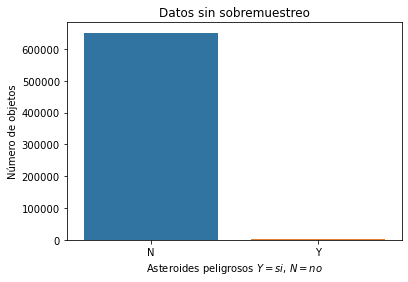

In [28]:
sns.countplot(y_ent)
plt.title('Datos sin sobremuestreo')
plt.xlabel('Asteroides peligrosos $Y = si$, $N = no$')
plt.ylabel('Número de objetos')
plt.show()

In [29]:
#Sobremuestreo
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1)
X_ent_s, y_ent_s = sm.fit_resample(X_ent, y_ent.ravel())

C:\Users\Cris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


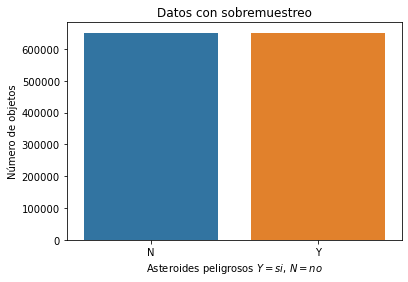

In [30]:
sns.countplot(y_ent_s)
plt.title('Datos con sobremuestreo')
plt.xlabel('Asteroides peligrosos $Y = si$, $N = no$')
plt.ylabel('Número de objetos')
plt.show()

In [31]:
from sklearn import metrics 

def metricCalculation(y_test, pred):
    precision_metric = metrics.precision_score(y_test, pred, average = "macro")
    recall_metric = metrics.recall_score(y_test, pred, average = "macro")
    accuracy_metric = metrics.accuracy_score(y_test, pred)
    f1_metric = metrics.f1_score(y_test, pred, average = "macro")
    print('Precision metric:',round(precision_metric, 2))
    print('Recall Metric:',round(recall_metric, 2))
    print('Accuracy Metric:',round(accuracy_metric, 4))
    print('F1 score:',round(f1_metric, 2))

In [32]:
y_ent_2 = y_ent_s

for n,i in enumerate(y_ent_2):
    if i=='Y':
      y_ent_2[n] = 1
    else:
        y_ent_2[n] = 0
        
y_p2 = y_p.cat.codes

Vamos a poner los parametros del modelo

In [33]:
import lightgbm as lgb 
train_data=lgb.Dataset(X_ent_s,label=y_ent_2)

cargamos los parametros

In [34]:
param = {'num_leaves': 150, 
         'nrounds': 350,
         'max_depth': 25,
         'learning_rate': 0.01, 
         'max_bin': 500
        }

In [35]:
lgbm = lgb.train(param, train_data)
lgbm_pred = lgbm.predict(X_p)

# Convert the predicted probabilities to 0 or 1
for i in range(0,len(y_p2)):
    if lgbm_pred[i]>=.5:       # setting threshold to .5
       lgbm_pred[i]=1
    else:  
       lgbm_pred[i]=0

[LightGBM] [Warning] Unknown parameter: nrounds
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: nrounds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.162654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15896
[LightGBM] [Info] Number of data points in the train set: 1302372, number of used features: 229
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [36]:
metricCalculation(y_p2, lgbm_pred)

Precision metric: 0.98
Recall Metric: 0.99
Accuracy Metric: 0.9999
F1 score: 0.98
